In [1]:
import os
import quandl

In [2]:
key = os.environ.get('QUANDL_KEY')
quandl.ApiConfig.api_key = key

In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [4]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize': (18,9)})

In [5]:
from tools import Forex, PortfolioManager, read_tx_efinance, merge_by_date_index, next_day

### The CSV file downloaded from postfinance

In [6]:
!ls transactions*

transactions-from-07092019-to-02112019.csv
transactions-from-14092019-to-09112019.csv


In [7]:
tx1 = 'transactions-from-07092019-to-02112019.csv'
tx2 = 'transactions-from-14092019-to-09112019.csv'

In [8]:
df = read_tx_efinance(tx2)
print(len(df))
df[:10]

82


,Date,Transaktionen,Symbol,Anzahl,Stückpreis,Kosten,Nettobetrag,Währung Nettobetrag,Saldo,Währung,Time
0,2019-11-07,Kauf,SOXL,250.0,231.97,266.99,-58259.49,USD,12899.50,USD,2019-11-07 17:27:48
1,2019-11-07,Verkauf,MTW,900.0,13.75,53.82,12321.18,USD,71158.99,USD,2019-11-07 15:30:12
2,2019-11-07,Verkauf,MTW,99.0,13.75,2.07,1359.18,USD,58837.81,USD,2019-11-07 15:30:06
3,2019-11-07,Verkauf,MTW,140.0,13.75,2.93,1922.07,USD,57478.63,USD,2019-11-07 15:30:06
4,2019-11-07,Verkauf,MTW,888.0,13.75,63.56,12146.44,USD,55556.56,USD,2019-11-07 15:30:06
5,2019-11-07,Verkauf,MTW,28.0,13.75,0.59,384.41,USD,43410.12,USD,2019-11-07 15:30:05
6,2019-11-07,Verkauf,MTW,100.0,13.75,2.09,1372.91,USD,43025.71,USD,2019-11-07 15:30:05
7,2019-11-07,Verkauf,MTW,70.0,13.75,1.47,961.03,USD,41652.80,USD,2019-11-07 15:30:05
8,2019-11-07,Verkauf,MTW,7.0,13.75,0.14,96.11,USD,40691.77,USD,2019-11-07 15:30:05
9,2019-11-07,Verkauf,MTW,127.0,13.75,12.66,1733.59,USD,40595.66,USD,2019-11-07 15:30:05


### Tokyo Elektron (TKY) is not av'le in Quandl, that's why we provide their prices separately

In [9]:
forex = Forex(['USD', 'EUR'])

tky_in_usd = 177.0 * forex.rate_for('EUR', 'USD', '2019-10-11')    
 # It's not available on my quandl subscription
special_prices = {'TKY': tky_in_usd}

In [10]:
pm = PortfolioManager(initial_amount=71.27, 
                      tx_file=tx2, 
                      special_prices=special_prices)

Getting price data from quandl...
Getting forex data for USD/CHF


### Trading days

In [11]:
ph = pd.DataFrame.from_dict(pm.portfolio_history, orient='index')
ph

,Giro,CHF,USD,SOXL,MTW,NVDA,SWKS,AMAT,TSM,TKY,ALGN,GME,WMT,AMD,networth
2019-09-25,232000.0,71.27,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232071.270000
2019-09-26,182000.0,49003.31,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0,0.0,0.0,232052.762800
2019-10-01,182000.0,13840.26,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2200.0,100.0,400.0,231163.418000
2019-10-02,182000.0,13840.26,34449.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,230182.767170
2019-10-07,182000.0,13840.26,10423.46,0.0,0.0,0.0,0.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0,230049.528470
2019-10-08,102000.0,16146.81,10423.46,0.0,0.0,0.0,0.0,0.0,2100.0,0.0,0.0,0.0,0.0,0.0,228277.577888
2019-10-11,52000.0,25183.41,10423.46,0.0,0.0,0.0,0.0,0.0,2100.0,200.0,0.0,0.0,0.0,0.0,229991.751088
2019-10-15,12000.0,22821.46,10423.46,0.0,0.0,0.0,0.0,0.0,2100.0,200.0,200.0,0.0,0.0,0.0,231735.658324
2019-10-16,12000.0,0.00,9024.82,0.0,0.0,150.0,400.0,0.0,2100.0,200.0,0.0,0.0,0.0,0.0,227579.137410
2019-10-18,12000.0,0.00,12976.00,0.0,0.0,150.0,800.0,0.0,1300.0,200.0,0.0,0.0,0.0,0.0,223404.566772


In [12]:
pr = list(pm.portfolio_history.items())[-1]
pr

(datetime.datetime(2019, 11, 7, 0, 0),
 {'Giro': 0.0,
  'CHF': 2986.25,
  'USD': 12899.5,
  'SOXL': 250.0,
  'MTW': 0.0,
  'NVDA': 200.0,
  'SWKS': 400.0,
  'AMAT': 600.0,
  'TSM': 800.0,
  'TKY': 0.0,
  'ALGN': 0.0,
  'GME': 0.0,
  'WMT': 0.0,
  'AMD': 0.0,
  'networth': 228918.7598})

### Quandl data

In [13]:
assets = ['SWKS', 'TSM', 'NVDA', 'AMAT', 'SOXL']
others = ['WMT', 'AMD', 'ALGN', 'GME', 'MTW']
benchmarks = ['SOXX', 'QQQ', 'SPY']
all_names = assets + others + benchmarks

eod={}
close={}
rel={}
for ticker in all_names:
    eod[ticker] = 'EOD/%s' % ticker
    close[ticker] = 'EOD/%s - Close' % ticker
    rel[ticker] = '%s-rel' % ticker 

start='2019-09-1'
frequency='daily'

data = quandl.get(list(eod.values()), collapse=frequency, trim_start=start) # , trim_end=end)
data = data[list(close.values())]
data.columns=list(all_names)
data.head()

for ticker in all_names:
    data['%s-rel' % ticker] = data [ticker] / data [ticker][0]

data.head()

,SWKS,TSM,NVDA,AMAT,SOXL,WMT,AMD,ALGN,GME,MTW,...,AMAT-rel,SOXL-rel,WMT-rel,AMD-rel,ALGN-rel,GME-rel,MTW-rel,SOXX-rel,QQQ-rel,SPY-rel
Date,,,,,,,,,,,,,,,,,,,,,
2019-09-03,74.17,41.72,164.17,47.61,146.89,114.64,30.90,177.91,3.81,11.68,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2019-09-04,76.02,43.15,168.76,49.51,158.90,115.91,30.95,176.38,3.98,11.79,...,1.039908,1.081762,1.011078,1.001618,0.991400,1.044619,1.009418,1.026867,1.014436,1.011075
2019-09-05,79.33,44.24,179.74,50.35,173.74,115.44,31.50,177.11,4.23,12.43,...,1.057551,1.182790,1.006978,1.019417,0.995503,1.110236,1.064212,1.058453,1.033019,1.024076
2019-09-06,79.87,43.71,178.65,50.10,174.44,114.73,30.56,175.06,4.31,12.59,...,1.052300,1.187555,1.000785,0.988997,0.983981,1.131234,1.077911,1.061283,1.031996,1.025107
2019-09-09,79.72,43.85,180.50,50.66,176.89,116.33,30.50,173.16,4.76,13.13,...,1.064062,1.204234,1.014742,0.987055,0.973301,1.249344,1.124144,1.065157,1.029841,1.025623


In [14]:
data.tail()

,SWKS,TSM,NVDA,AMAT,SOXL,WMT,AMD,ALGN,GME,MTW,...,AMAT-rel,SOXL-rel,WMT-rel,AMD-rel,ALGN-rel,GME-rel,MTW-rel,SOXX-rel,QQQ-rel,SPY-rel
Date,,,,,,,,,,,,,,,,,,,,,
2019-11-11,100.38,52.60,208.18,56.59,226.23,119.04,36.31,258.60,6.02,16.30,...,1.188616,1.540132,1.038381,1.175081,1.453544,1.580052,1.395548,1.166021,1.082467,1.060533
2019-11-12,101.59,52.15,209.61,56.42,228.23,119.12,36.71,258.97,5.92,15.90,...,1.185045,1.553748,1.039079,1.188026,1.455624,1.553806,1.361301,1.168405,1.085591,1.062769
2019-11-13,101.14,52.88,208.57,57.12,228.10,120.98,37.52,259.63,5.94,15.63,...,1.199748,1.552863,1.055304,1.214239,1.459333,1.559055,1.338185,1.169646,1.085860,1.063113
2019-11-14,98.75,52.48,209.79,56.96,226.22,120.65,38.35,260.44,5.98,15.57,...,1.196387,1.540064,1.052425,1.241100,1.463886,1.569554,1.333048,1.165773,1.084999,1.064660
2019-11-15,99.42,53.29,204.19,62.06,232.10,118.87,38.56,263.92,5.88,15.56,...,1.303508,1.580094,1.036898,1.247896,1.483447,1.543307,1.332192,1.176450,1.092971,1.072365


### Merge portfolio history and price history

In [15]:
nw0 = ph['networth'].iloc[0]

rels = pd.merge(ph['networth']/nw0, data, how='outer', right_on=data.index, left_on=ph.index)

cols = ['%s-rel' % ticker for ticker in assets+benchmarks]
cols = cols + ['networth', 'ideal']

rels.rename(columns={'key_0': 'Date'}, inplace=True)
rels.set_index('Date', inplace=True)
rels.sort_index(inplace=True)
rels['ideal'] = np.nan

In [18]:
rels.head()

,networth,SWKS,TSM,NVDA,AMAT,SOXL,WMT,AMD,ALGN,GME,...,SOXL-rel,WMT-rel,AMD-rel,ALGN-rel,GME-rel,MTW-rel,SOXX-rel,QQQ-rel,SPY-rel,ideal
Date,,,,,,,,,,,,,,,,,,,,,
2019-09-03,NaN,74.17,41.72,164.17,47.61,146.89,114.64,30.90,177.91,3.81,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
2019-09-04,NaN,76.02,43.15,168.76,49.51,158.90,115.91,30.95,176.38,3.98,...,1.081762,1.011078,1.001618,0.991400,1.044619,1.009418,1.026867,1.014436,1.011075,NaN
2019-09-05,NaN,79.33,44.24,179.74,50.35,173.74,115.44,31.50,177.11,4.23,...,1.182790,1.006978,1.019417,0.995503,1.110236,1.064212,1.058453,1.033019,1.024076,NaN
2019-09-06,NaN,79.87,43.71,178.65,50.10,174.44,114.73,30.56,175.06,4.31,...,1.187555,1.000785,0.988997,0.983981,1.131234,1.077911,1.061283,1.031996,1.025107,NaN
2019-09-09,NaN,79.72,43.85,180.50,50.66,176.89,116.33,30.50,173.16,4.76,...,1.204234,1.014742,0.987055,0.973301,1.249344,1.124144,1.065157,1.029841,1.025623,NaN


In [16]:
def calc_networth(row, pm, date, pr):

    usd_chf = pm.forex.rate_for('USD', 'CHF', date)

    def price(symbol):
        if symbol == 'TKY':
            return tky_in_usd
        else:
            return row[symbol]
    
    networth = (
        pr['Giro'] + pr['CHF'] + 
        np.sum([price(symbol) * pr[symbol] * usd_chf 
                for symbol in pm.symbols]) +
        pr['USD'] * usd_chf
    )
    pr['networth'] = networth
    return networth


In [17]:
last_date, last_record = list(pm.portfolio_history.items())[-1]
ideal0 = calc_networth(row=rels.iloc[0], pm=pm, pr=last_record, date=last_date)
ideal0

176147.1068

In [19]:
last_record = list(pm.portfolio_history.items())[-1][1]
calc_networth(row=last_record, pm=pm, pr=last_record, date=last_date)

prev_record = list(pm.portfolio_history.items())[0][1]
for r in rels.iterrows():
    nw = r[1]['networth']
    date = r[0].to_pydatetime()
    r[1]['ideal'] = calc_networth(row=r[1], pm=pm, pr=last_record, date=date) / ideal0
    if np.isnan(nw):
        r[1]['networth'] = calc_networth(row=r[1], pm=pm, pr=prev_record, date=last_date) / nw0
    else:
        prev_record = pm.portfolio_history[last_date]

In [22]:
rels.tail()

,networth,SWKS,TSM,NVDA,AMAT,SOXL,WMT,AMD,ALGN,GME,...,SOXL-rel,WMT-rel,AMD-rel,ALGN-rel,GME-rel,MTW-rel,SOXX-rel,QQQ-rel,SPY-rel,ideal
Date,,,,,,,,,,,,,,,,,,,,,
2019-11-11,0.987125,100.38,52.60,208.18,56.59,226.23,119.04,36.31,258.60,6.02,...,1.540132,1.038381,1.175081,1.453544,1.580052,1.395548,1.166021,1.082467,1.060533,1.298459
2019-11-12,0.990589,101.59,52.15,209.61,56.42,228.23,119.12,36.71,258.97,5.92,...,1.553748,1.039079,1.188026,1.455624,1.553806,1.361301,1.168405,1.085591,1.062769,1.302238
2019-11-13,0.993090,101.14,52.88,208.57,57.12,228.10,120.98,37.52,259.63,5.94,...,1.552863,1.055304,1.214239,1.459333,1.559055,1.338185,1.169646,1.085860,1.063113,1.301761
2019-11-14,0.986240,98.75,52.48,209.79,56.96,226.22,120.65,38.35,260.44,5.98,...,1.540064,1.052425,1.241100,1.463886,1.569554,1.333048,1.165773,1.084999,1.064660,1.291493
2019-11-15,1.004784,99.42,53.29,204.19,62.06,232.10,118.87,38.56,263.92,5.88,...,1.580094,1.036898,1.247896,1.483447,1.543307,1.332192,1.176450,1.092971,1.072365,1.317351


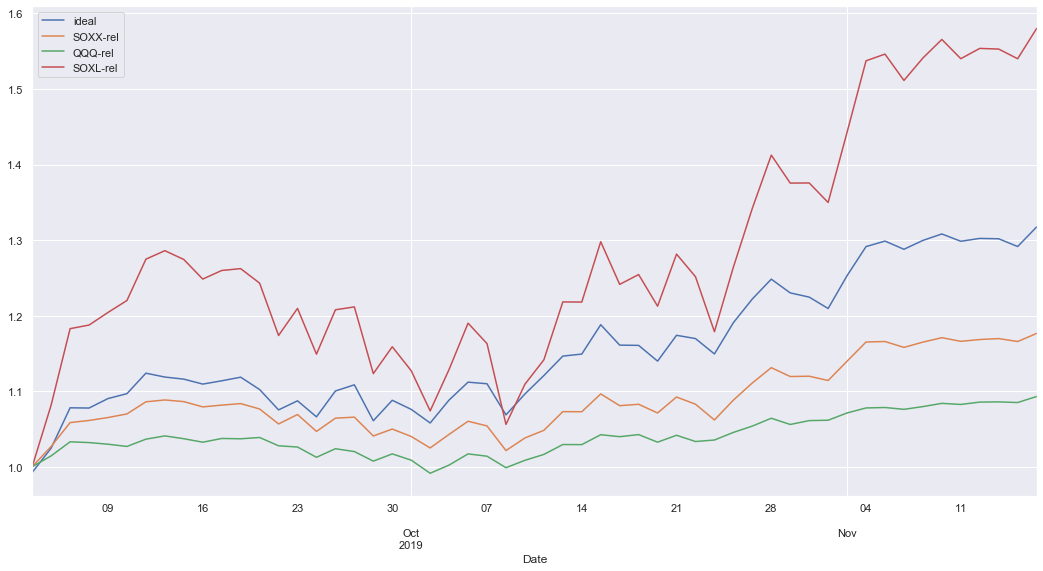

In [25]:
rels[['ideal', 'SOXX-rel', 'QQQ-rel', 'SOXL-rel']].plot();

### Performance against the sector

In [26]:
compto = 'ideal'

In [27]:
sc = rels[['SOXX-rel', compto]].copy()

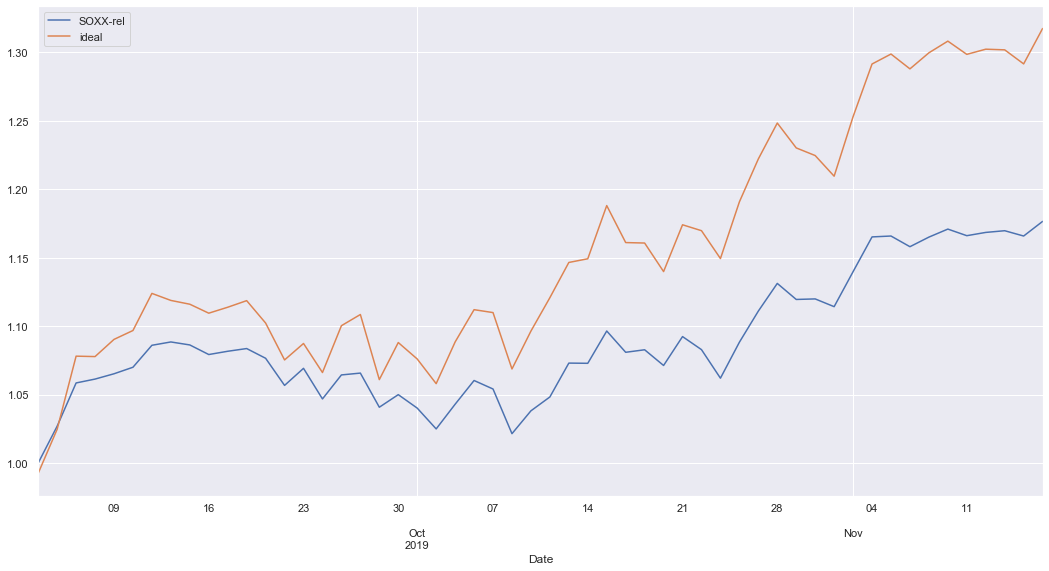

In [28]:
sc.plot();

In [29]:
stocks = ['SOXX', 'NVDA', 'AMAT', 'SWKS', 'TSM']

In [30]:
def plot_rel(stocks, start):
    eods = ['EOD/%s' % stock for stock in stocks]
    closes = ['EOD/%s - Adj_Close' % stock for stock in stocks]
    data = quandl.get(eods, collapse=frequency, trim_start=start) # , trim_end=end)
    data = data[closes]
    for s in stocks:
        v0 = data['EOD/%s - Adj_Close' % s].iloc[0] 
        data[s] = data['EOD/%s - Adj_Close' % s] / v0
        del data['EOD/%s - Adj_Close' % s]
    data.plot();
    return data

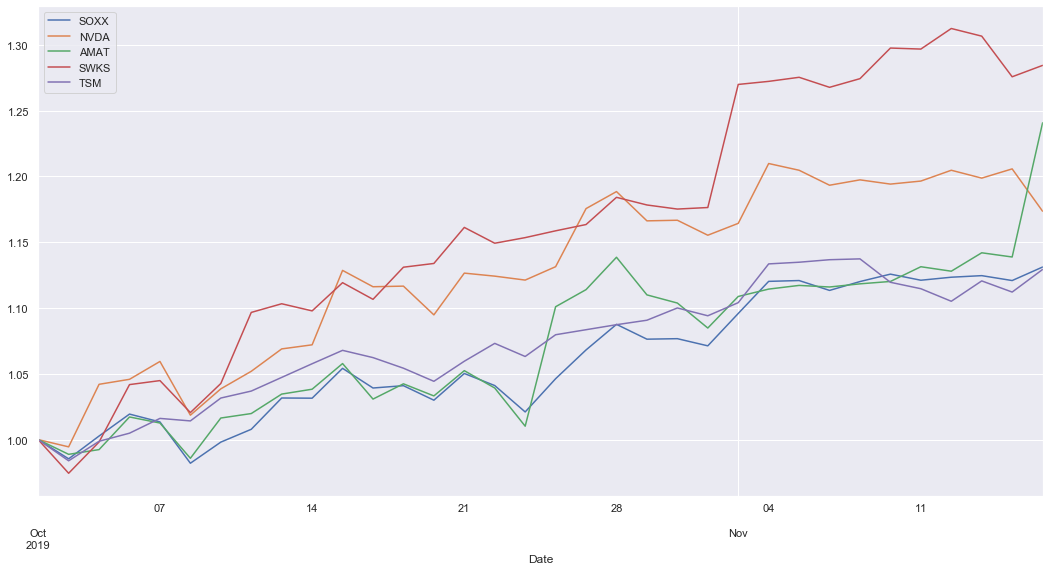

In [31]:
data = plot_rel(stocks, "2019-10-01")

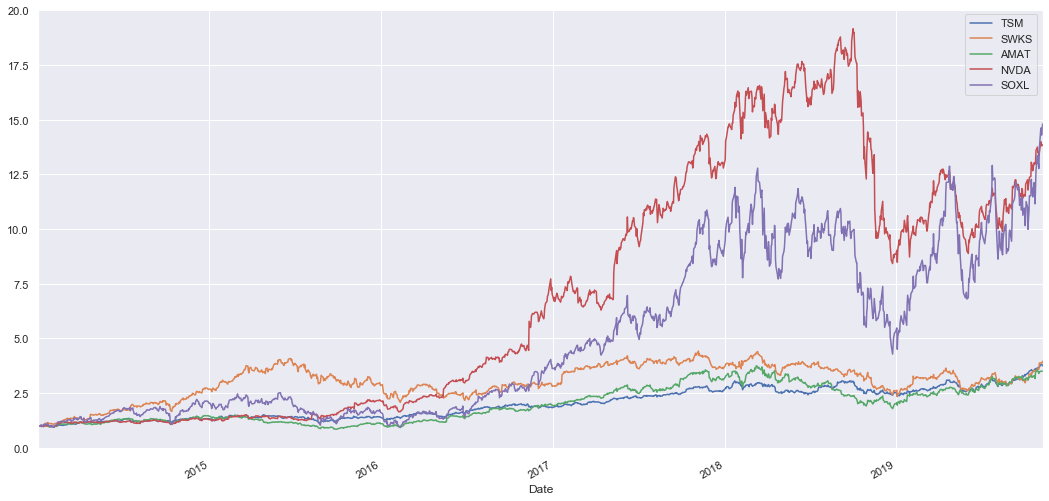

In [188]:
data = plot_rel(['TSM', 'SWKS', 'AMAT', 'NVDA', 'SOXL'], "2014-01-01")

In [189]:
data['ewp'] = np.log((data['TSM'] + data['SWKS'] + data['AMAT'])/3)
data['ewpn'] = np.log((data['TSM'] + data['SWKS'] + data['AMAT'] + data['NVDA'])/4)
data['ewpns'] = np.log((data['TSM'] + data['SWKS'] + data['AMAT'] + data['NVDA'] + 1.2*data['SOXL'])/5)

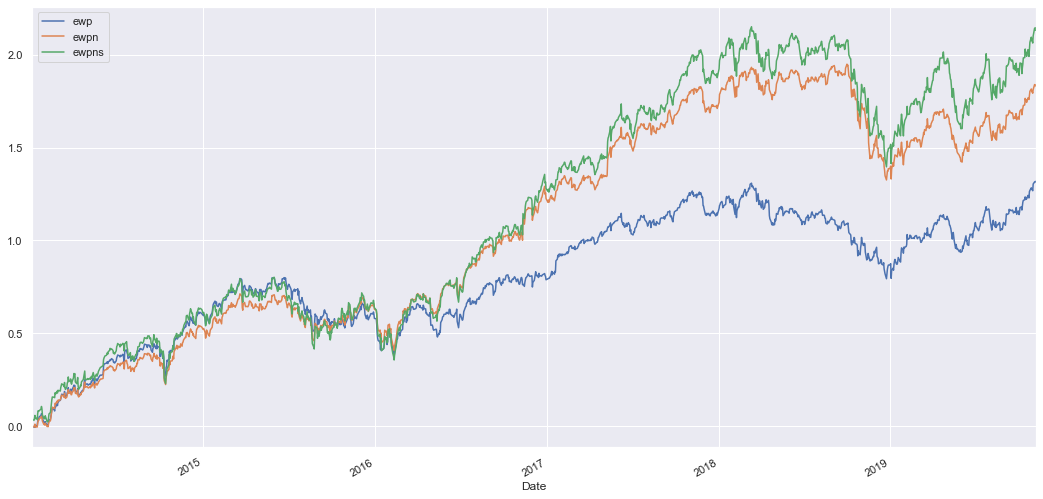

In [195]:
data[['ewp', 'ewpn', 'ewpns']].plot();